### Number of Tasks

1. Monitor Training Performance and Early Stopping
2. Tune Multithreading Support for XGBoost

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_tree
import pickle
from sklearn.externals import joblib
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.model_selection import StratifiedKFold


### Reading Dataset¶

In [11]:
titanic = pd.read_csv('/home/hasan/DATA SET/titanic dataset/train.csv')

### Summarize the dataset

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.shape

(891, 12)

In [16]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# total number of every species
titanic.groupby('Sex')['Sex'].agg(['count']).rename(columns={'count':'Total_number'}).sort_values(by='Total_number', ascending=False)

,Total_number
Sex,
male,577
female,314


### Dropping Unnecessary columns¶

In [19]:
titanic.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Dropping nan data

In [21]:
titanic.fillna('ffill', inplace=True)

### Encoding

In [22]:
titanic = pd.get_dummies(titanic)

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age_0.42,Age_0.67,...,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Age_ffill,Embarked_C,Embarked_Q,Embarked_S,Embarked_ffill
0,1,0,3,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,3,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Feature and Label data

In [24]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

### Dividing dataset

In [25]:
seed = 7
test_size = 0.33
Xtrain, xtest, Ytrain, ytest = train_test_split(X, y, test_size=test_size,random_state=seed)

### Monitoring Training Performance With XGBoost

In [26]:
#model
model = XGBClassifier()
eval_set = [(xtest, ytest)]
model.fit(Xtrain, Ytrain, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.24407
[1]	validation_0-error:0.24407
[2]	validation_0-error:0.22373
[3]	validation_0-error:0.22373
[4]	validation_0-error:0.22373
[5]	validation_0-error:0.22712
[6]	validation_0-error:0.22712
[7]	validation_0-error:0.22373
[8]	validation_0-error:0.22034
[9]	validation_0-error:0.22034
[10]	validation_0-error:0.22373
[11]	validation_0-error:0.21695
[12]	validation_0-error:0.22034
[13]	validation_0-error:0.21695
[14]	validation_0-error:0.20678
[15]	validation_0-error:0.21356
[16]	validation_0-error:0.21356
[17]	validation_0-error:0.21017
[18]	validation_0-error:0.21017
[19]	validation_0-error:0.21695
[20]	validation_0-error:0.22034
[21]	validation_0-error:0.22034
[22]	validation_0-error:0.22034
[23]	validation_0-error:0.21695
[24]	validation_0-error:0.21695
[25]	validation_0-error:0.21695
[26]	validation_0-error:0.22034
[27]	validation_0-error:0.22034
[28]	validation_0-error:0.22712
[29]	validation_0-error:0.23390
[30]	validation_0-error:0.23051
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
#predict
predictions = model.predict(xtest)

In [29]:
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.59%


### Evaluate XGBoost Models With Learning Curves

In [31]:
#model
model = XGBClassifier()
eval_set = [(Xtrain, Ytrain), (xtest, ytest)]
model.fit(Xtrain, Ytrain, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.13926	validation_0-logloss:0.55375	validation_1-error:0.24407	validation_1-logloss:0.58932
[1]	validation_0-error:0.12920	validation_0-logloss:0.47234	validation_1-error:0.24407	validation_1-logloss:0.54358
[2]	validation_0-error:0.13423	validation_0-logloss:0.42026	validation_1-error:0.22373	validation_1-logloss:0.51273
[3]	validation_0-error:0.12584	validation_0-logloss:0.38214	validation_1-error:0.22373	validation_1-logloss:0.50246
[4]	validation_0-error:0.11409	validation_0-logloss:0.35112	validation_1-error:0.22373	validation_1-logloss:0.49620
[5]	validation_0-error:0.11074	validation_0-logloss:0.32718	validation_1-error:0.22712	validation_1-logloss:0.49266
[6]	validation_0-error:0.10570	validation_0-logloss:0.31034	validation_1-error:0.22712	validation_1-logloss:0.49905
[7]	validation_0-error:0.10906	validation_0-logloss:0.29784	validation_1-error:0.22373	validation_1-logloss:0.49828
[8]	validation_0-error:0.10906	validation_0-logloss:0.28564	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
# make predictions for test data
predictions = model.predict(xtest)

In [34]:
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.59%


In [35]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

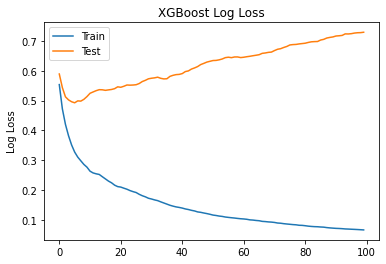

In [37]:
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

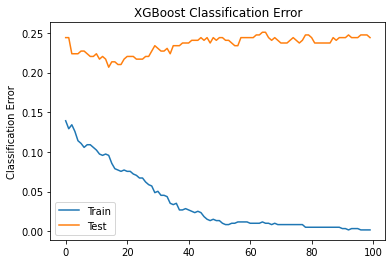

In [39]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()


### Early Stopping With XGBoost

In [41]:
#model
model = XGBClassifier()
eval_set = [(xtest, ytest)]
model.fit(Xtrain, Ytrain, early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.58932
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.54358
[2]	validation_0-logloss:0.51273
[3]	validation_0-logloss:0.50246
[4]	validation_0-logloss:0.49620
[5]	validation_0-logloss:0.49266
[6]	validation_0-logloss:0.49905
[7]	validation_0-logloss:0.49828
[8]	validation_0-logloss:0.50431
[9]	validation_0-logloss:0.51351
[10]	validation_0-logloss:0.52460
[11]	validation_0-logloss:0.52907
[12]	validation_0-logloss:0.53342
[13]	validation_0-logloss:0.53669
[14]	validation_0-logloss:0.53630
[15]	validation_0-logloss:0.53448
Stopping. Best iteration:
[5]	validation_0-logloss:0.49266



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# make predictions for test data
predictions = model.predict(xtest)

In [43]:
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.29%


### Impact of the Number of Threads

In [49]:
# evaluate the effect of the number of threads
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
    start = time()
    model = XGBClassifier(nthread=n)
    model.fit(X, y)
    elapsed = time() - start
    print(n, elapsed)
    results.append(elapsed)
    

1 0.3919191360473633
2 0.21046161651611328
3 0.21750998497009277
4 0.2542085647583008


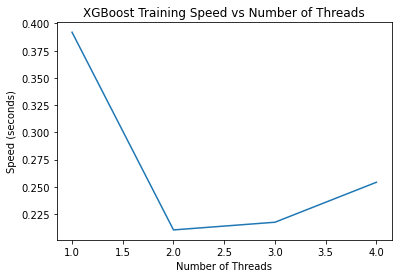

In [51]:
# plot results
plt.plot(num_threads, results)
plt.ylabel('Speed (seconds)')
plt.xlabel('Number of Threads')
plt.title('XGBoost Training Speed vs Number of Threads')
plt.show()


### Parallelism When Cross Validating XGBoost Models

In [54]:
# prepare cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)


In [57]:
# Single Thread XGBoost, Parallel Thread CV
start = time()
model = XGBClassifier(nthread=1)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_log_loss', n_jobs=-1)
elapsed = time() - start
print("Single Thread XGBoost, Parallel Thread CV: %f" % (elapsed))


Single Thread XGBoost, Parallel Thread CV: 1.639454


In [58]:
# Parallel Thread XGBoost, Single Thread CV
start = time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_log_loss',n_jobs=1)
elapsed = time() - start
print("Parallel Thread XGBoost, Single Thread CV: %f" % (elapsed))

Parallel Thread XGBoost, Single Thread CV: 3.377029


In [59]:
# Parallel Thread XGBoost and CV
start = time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_log_loss',n_jobs=-1)
elapsed = time() - start
print("Parallel Thread XGBoost and CV: %f" % (elapsed))

Parallel Thread XGBoost and CV: 1.666044
